In [1]:
from polymorph_s2df.devutils import *
from polymorph_num import ops
from polymorph_sketch.draw_api import draw, loss, distance_param, angle_param, point_param, debug_inner_node, real_param

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


p0 (0.0, 0.0)
p1 (-4.371138473402425e-08, 0.9999998807907104)
p2 (1.2000023126602173, 0.9999998807907104)
p3 (1.1991736888885498, -0.1999996453523636)
---
p0-p1 0.9999998807907104
p1-p2 1.2000023126602173
p2-p3 1.1999999284744263
p3-p0 1.2157374620437622
---
p0^p1 90.0
p1^p2 0.0
p2^p3 -90.03955841064453
p3^p0 170.53128051757812


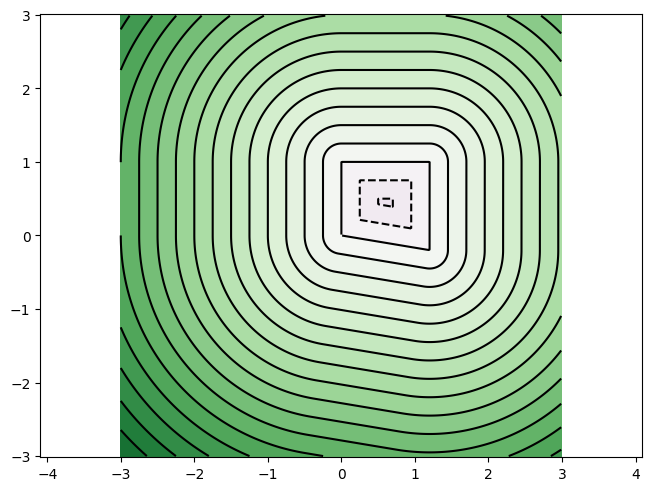

In [3]:
d = draw()
p0 = d.current_point
p1 = d.line().move_by_polar(90, distance_param()).current_point
p2 = d.line().horizontal_move_by(real_param()).current_point
p3 = d.line().move_by_polar(angle_param().opposite(), distance_param()).current_point
shape = d.line().close()

sketch = (
    loss()
    .fit_distance((p1 - p0).norm(), 1)
    .fit_distance((p2 - p1).norm(), 1.2)
    .fit_distance((p2 - p3).norm(), 1.2)
    .fit_angle((p3 - p2).direction(), 270)
    .create_sketch()
)

sketch.add_shape(shape)

print("p0", sketch.debug(p0))
print("p1", sketch.debug(p1))
print("p2", sketch.debug(p2))
print("p3", sketch.debug(p3))

print("---")

print("p0-p1", sketch.debug((p0 - p1).norm()))
print("p1-p2", sketch.debug((p2 - p1).norm()))
print("p2-p3", sketch.debug((p2 - p3).norm()))
print("p3-p0", sketch.debug((p0 - p3).norm()))

print("---")

print("p0^p1", sketch.debug((p1 - p0).direction()))
print("p1^p2", sketch.debug((p2 - p1).direction()))
print("p2^p3", sketch.debug((p3 - p2).direction()))
print("p3^p0", sketch.debug((p0 - p3).direction()))


sketch.plot()



In [12]:
def normalize_angle(q):
    """
    Normalize an angle to the range [0, 360)
    """
    return ((q % 360) + 360) % 360


In [13]:
normalize_angle(-180)

180

In [14]:
normalize_angle(270)

270

In [15]:
normalize_angle(-181)

179

In [17]:
normalize_angle(-90)

270